* https://www.analyticsvidhya.com/blog/2021/06/rule-based-sentiment-analysis-in-python/
* https://www.geeksforgeeks.org/nlp-synsets-for-a-word-in-wordnet/
* https://github.com/harika-bonthu/StemVsLemma/blob/main/stem_lemma.ipynb

### Importing dependencies

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re                # RegEx - used to work with Regular Expressions.
import nltk              # the module is used for Natural Language processing, along with some text processing libraries for tokenisation, stemming, etc.
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from textblob import TextBlob
import string
#import snscrape.modules.twitter as sntwitter
import warnings

%matplotlib inline
warnings.filterwarnings('ignore')

nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag

nltk.download('averaged_perceptron_tagger')

nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\M0780773\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\M0780773\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\M0780773\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
review_data = pd.read_excel(r'C:\Users\M0780773\OneDrive - Saint-Gobain\Desktop\Projects\Sentiment Analysis\employee_reviews.xlsm')
review_data.head()

,Employee Code,company,location,dates,job-title,summary,pros,cons,advice-to-mgmt,overall-ratings,work-balance-stars,culture-values-stars,carrer-opportunities-stars,comp-benefit-stars,senior-mangemnet-stars,link
0,1,google,none,"Dec 11, 2018",Current Employee - Anonymous Employee,Best Company to work for,People are smart and friendly,Bureaucracy is slowing things down,none,Excellent,Good,Excellent,Excellent,Good,Excellent,https://www.glassdoor.com/Reviews/Google-Revie...
1,2,google,"Mountain View, CA","Jun 21, 2013",Former Employee - Program Manager,"Moving at the speed of light, burn out is inev...","1) Food, food, food. 15+ cafes on main campus ...",1) Work/life balance. What balance? All those ...,1) Don't dismiss emotional intelligence and ad...,Good,Bad,Average,Average,Excellent,Average,https://www.glassdoor.com/Reviews/Google-Revie...
2,3,google,"New York, NY","May 10, 2014",Current Employee - Software Engineer III,Great balance between big-company security and...,"* If you're a software engineer, you're among ...","* It *is* becoming larger, and with it comes g...",Keep the focus on the user. Everything else wi...,Excellent,Excellent,Good,Excellent,Excellent,Good,https://www.glassdoor.com/Reviews/Google-Revie...
3,4,google,"Mountain View, CA","Feb 8, 2015",Current Employee - Anonymous Employee,The best place I've worked and also the most d...,You can't find a more well-regarded company th...,I live in SF so the commute can take between 1...,Keep on NOT micromanaging - that is a huge ben...,Excellent,Bad,Excellent,Excellent,Good,Excellent,https://www.glassdoor.com/Reviews/Google-Revie...
4,5,google,"Los Angeles, CA","Jul 19, 2018",Former Employee - Software Engineer,"Unique, one of a kind dream job",Google is a world of its own. At every other c...,"If you don't work in MTV (HQ), you will be giv...",Promote managers into management for their man...,Excellent,Excellent,Excellent,Excellent,Excellent,Excellent,https://www.glassdoor.com/Reviews/Google-Revie...


In [3]:
review_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67529 entries, 0 to 67528
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Employee Code               67529 non-null  int64 
 1   company                     67529 non-null  object
 2   location                    67529 non-null  object
 3   dates                       67529 non-null  object
 4   job-title                   67529 non-null  object
 5   summary                     67409 non-null  object
 6   pros                        67529 non-null  object
 7   cons                        67529 non-null  object
 8   advice-to-mgmt              67232 non-null  object
 9   overall-ratings             67529 non-null  object
 10  work-balance-stars          67529 non-null  object
 11  culture-values-stars        67529 non-null  object
 12  carrer-opportunities-stars  67529 non-null  object
 13  comp-benefit-stars          67529 non-null  ob

val = ['amazon', 'apple', 'facebook', 'google', 'microsoft', 'netflix']

##### Amazon Data:

In [4]:
amazon_data = review_data.loc[review_data['company'] == 'amazon']
amazon_data.head()

,Employee Code,company,location,dates,job-title,summary,pros,cons,advice-to-mgmt,overall-ratings,work-balance-stars,culture-values-stars,carrer-opportunities-stars,comp-benefit-stars,senior-mangemnet-stars,link
7819,7820,amazon,"Phoenix, AZ",None,Current Employee - Software Development Manager,An Amazing Place to Work,"I've been at Amazon for a month now, and I've ...","No cons, so far - seriously. Like I said, I'm ...",none,Excellent,Good,Excellent,Excellent,Excellent,Excellent,https://www.glassdoor.com/Reviews/Amazon-Revie...
7820,7821,amazon,"Sunnyvale, CA","Dec 10, 2018","Current Employee - Manager, Software Developme...",Software Development Engineering Manager,"Work hard, have fun, make history. Be proud of...",RUS grand each year related to last year's sto...,none,Excellent,Excellent,Excellent,Excellent,Good,Excellent,https://www.glassdoor.com/Reviews/Amazon-Revie...
7821,7822,amazon,"Seattle, WA","Jan 10, 2016",Current Employee - Anonymous Employee,You Get What You Put In,"Really smart people, a lot of opportunity for ...",You have to be self motivated. NO ONE will hol...,More on-boarding training before new employees...,Excellent,Good,Excellent,Excellent,Excellent,Excellent,https://www.glassdoor.com/Reviews/Amazon-Revie...
7822,7823,amazon,"Seattle, WA","Feb 20, 2016",Current Employee - Senior Engineering Manager,"Exciting Work, Abusive Culture","Jeff Bezos and his ""S-Team"" are brilliant and ...","The management process is abusive, and I'm cur...",Don't pretend that the recent NY Times article...,Average,Average,Average,Average,Good,Good,https://www.glassdoor.com/Reviews/Amazon-Revie...
7823,7824,amazon,"Seattle, WA","Dec 17, 2013",Current Employee - Software Development Manager,"Can be amazing for some people, horrible for o...",Amazon is doing lot's of cool stuff...but lots...,- You're responsible for your own career progr...,Stack ranking is a horrible practice since it'...,Good,Average,Average,Excellent,Excellent,Good,https://www.glassdoor.com/Reviews/Amazon-Revie...


In [5]:
amazon_data.shape

(26430, 16)

##### Apple Data:

apple_data = review_data.loc[review_data['company'] == 'apple']
apple_data.head()

apple_data.shape

##### Facebook Data:

fb_data = review_data.loc[review_data['company'] == 'facebook']
fb_data.head()

fb_data.shape

##### Google Data

google_data = review_data.loc[review_data['company'] == 'google']
google_data.head()

google_data.shape

##### Microsoft Data

micro_data = review_data.loc[review_data['company'] == 'microsoft']
micro_data.head()

micro_data.shape

##### Netflix Data

netflix_data = review_data.loc[review_data['company'] == 'netflix']
netflix_data.head()

netflix_data.shape

    Amazon = 26430
    Apple = 12950
    Facebook = 1590
    Google = 7819
    Microsoft = 17930
    Netflix = 810

### Combining Columns - Summary, Pros, Cons, advice-to-mgmt into one new column -> Feedback

In [6]:
amazon_data['feedback'] = amazon_data["summary"].astype(str) +" "+ amazon_data["pros"].astype(str) +" "+ amazon_data['cons'].astype(str) +" "+ amazon_data['advice-to-mgmt'].astype(str)

In [7]:
amazon_data['feedback']

7819     An Amazing Place to Work I've been at Amazon f...
7820     Software Development Engineering Manager Work ...
7821     You Get What You Put In Really smart people, a...
7822     Exciting Work, Abusive Culture Jeff Bezos and ...
7823     Can be amazing for some people, horrible for o...
                               ...                        
34244    Super Firma,sehr zu empfehlen! Freundliche Atm...
34245    Work hard, have fun Gute EntwicklungsmÃ¶glichk...
34246    Top verpacker Sehr gute bezahlung flexibele ze...
34247    Bon dans l'ensemble Il y a des avantages consÃ...
34248    Bitte Ich mÃ¶chte erdbebenzuber max bitte mir ...
Name: feedback, Length: 26430, dtype: object

review_data['feedback'] = review_data[['summary', 'pros', 'cons', 'advice-to-mgmt']].apply(lambda x: ' '.join(x), axis = 1)

merged_column = pd.concat([review_data['summary'], review_data['pros'], review_data['cons'], review_data['advice-to-mgmt']], axis=1)
print(merged_column)

#### Next Steps:
1. Add Employee# column against each record - done
2. take the feedback column and try finding sentiment analysis for each employee (Polarity index)

##### Saving the feedback column in a new dataframe

#emp_review_data = review_data['feedback']

#emp_review_data.info()

In [8]:
emp_review_data = pd.DataFrame(data=amazon_data, columns=['feedback'])

In [9]:
emp_review_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26430 entries, 7819 to 34248
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   feedback  26430 non-null  object
dtypes: object(1)
memory usage: 413.0+ KB


In [10]:
emp_review_data.head()

,feedback
7819,An Amazing Place to Work I've been at Amazon f...
7820,Software Development Engineering Manager Work ...
7821,"You Get What You Put In Really smart people, a..."
7822,"Exciting Work, Abusive Culture Jeff Bezos and ..."
7823,"Can be amazing for some people, horrible for o..."


In [11]:
emp_review_data.rename(columns = {'feedback':'text'}, inplace = True)
emp_review_data.head()

,text
7819,An Amazing Place to Work I've been at Amazon f...
7820,Software Development Engineering Manager Work ...
7821,"You Get What You Put In Really smart people, a..."
7822,"Exciting Work, Abusive Culture Jeff Bezos and ..."
7823,"Can be amazing for some people, horrible for o..."


### Applying Text Preprocessing in the review data

In [12]:
characterMap = {u'\u00E7': 'c', u'\u00C7' : 'C', u'\u011F' : 'g', u'\u011E' : 'G', 
                u'\u00F6': 'o', u'\u00D6' : 'O', u'\u015F' : 's', u'\u015E' : 'S', 
                u'\u00FC' : 'u', u'\u00DC' : 'U' , u'\u0131' : 'i', u'\u0049' : 'I', 
                u'\u0259' : 'e', u'\u018F' : 'E'}

In [13]:
# for removing punctuations from the text.
def remove_punctuation(text):  
    text_nopunt="".join([c for c in text if c not in string.punctuation])
    return text_nopunt

In [14]:
# for removing additional punctuations and non sensical text that was missed the first time around
def clean_text_round2(text, words):
    
    text =  re.sub(r"\b[a-zA-Z]\b", "", text)
    text =  re.sub(r"\b[a-zA-Z][a-zA-Z]\b", "", text)
    text =  re.sub("[^a-zA-Z]"," ",text)# Search for all non-letters # Replace all non-letters with spaces
    text =  " ".join(w for w in nltk.wordpunct_tokenize(text) if w.lower() in words or not w.isalpha())
    text =  re.sub(r' +', ' ',text)
    return text

In [15]:
# for lemmatization of text
def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]

In [16]:
def stem_lemma(df,txt):
    lemmatize_text = txt
    data['text'] = df.text.apply(lemmatize_text)
    data['text'] = data.text.apply(' '.join)
    
    return data;

In [17]:
# for text preprocessing
def text_preprocessing(data):
    
    # step 1: remove ascent letters
    data['text'] = (data['text'].astype("str")
                              .str.rstrip()   ## is used to remove extra white space
                              .replace(characterMap, regex=True)
                              .str.normalize('NFKD')
                              .str.encode('ascii', errors='ignore')
                              .str.decode('utf-8'))
    
    
    # Step 2: converting to lowercase
    data.text = data.text.str.lower()
    
    # Step 3: removing URL from data
    data['text'] = data['text'].str.replace(r'http\S+|www.\S+','',case=False)
    
    # Step 4: removing punctuation
    string.punctuation
    data['text']=data['text'].apply(lambda x : remove_punctuation(x))
    
    # Step 5: Removing numbers from data
    data['text'] = data['text'].str.replace('\d+', '')
    
    # Step 6: Removing stopwords from data
    nltk.download('stopwords')
    from nltk.corpus import stopwords
    stop = stopwords.words('english')
    data['text'] = data['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
    
    # Step 7: Replacing Similar codes in the data
    nltk.download('words')
    words = set(nltk.corpus.words.words())
    round2 = lambda x: clean_text_round2(x, words)
    data = pd.DataFrame(data.text.apply(round2))
    
    # Step 8: Applying Stemming and Lemmatisation
    from nltk.stem import PorterStemmer
    nltk.download('wordnet')
    # the most commonly used stemmer
    ps = PorterStemmer()
    w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
    lemmatizer = nltk.stem.WordNetLemmatizer()
    #data = stem_lemma(data, lemmatizer)
    def lemmatize_text(text):
        return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]
    
    data['text'] = data.text.apply(lemmatize_text)
    data['text'] = data.text.apply(' '.join)
    
    # Step 9: Strip Extra Whitespaces
    data['text'] = (data['text'].astype("str").str.rstrip())
    
    return data;

#### Preprocessing the employee feedback

In [18]:
processed_data = text_preprocessing(emp_review_data)
processed_data.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\M0780773\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\M0780773\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\M0780773\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,text
7819,amazing place work month seen none horror publ...
7820,development engineering manager work hard fun ...
7821,get put really smart people lot opportunity gr...
7822,exciting work abusive culture jeff steam brill...
7823,amazing people horrible lot cool lot boring st...


#### POS Tagger Dictionary - for SentiWordNet

#### POS tagger dictionary
from nltk.corpus import wordnet
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}

def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
            newlist.append(tuple([word, pos_dict.get(tag[0])]))
            
            return newlist



processed_data.head()

processed_data['POS tagged'] = processed_data['text'].apply(token_stop_pos)
processed_data.head()

##### Preparing WordCloud on the processed data

##### Document Term Matrix

In [19]:
# We are going to create a document-term matrix using CountVectorizer, and exclude common English stop words
from sklearn.feature_extraction.text import CountVectorizer

In [20]:
# preparing the document term matrix for identifying most frequent words in the collection of text
def doc_term_matrix(data):
    
    cv = CountVectorizer(stop_words='english')
    data_cv = cv.fit_transform(data.text)
    data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names_out())

    # One of the required inputs is a term-document matrix
    tdm = data_dtm.transpose()

    tdm['freq'] = tdm.sum(axis=1)
    
    tdm.reset_index(inplace=True)
    
    tdm1=tdm[["index","freq"]]
    tdm1.rename(columns = {'index':'Word'}, inplace = True)
    tdm1.sort_values(by='freq',ascending=False,inplace=True)
    
    return tdm1;

In [21]:
# Function to plot bar-graph for visualization of most frequent words
def plot_bar(df):
    
    import seaborn as sns
    tdm1 = doc_term_matrix(df)
    
    w = tdm1[tdm1['freq'] >=2000] 
    
    fg = sns.catplot(x='Word', y='freq',
                        size=6,  aspect=2,
                        kind='bar', 
                        data=w)

In [22]:
# Function to form word-cloud on tweets collected
def plot_wordcloud(df_feedback):
    text = " ".join(review for review in df_feedback.text)
    print ("There are {} words in the combination of all review.".format(len(text)))
    

    wordcloud = WordCloud(background_color="white",max_words=2000,collocations=False).generate(text)
    plt.figure(figsize=[15,27])
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

In [23]:
import seaborn as sns
sns.__version__

'0.12.2'

#plot_bar(processed_data)

Solution for: MemoryError: Unable to allocate 7.48 GiB for an array with shape (67530, 14859) and data type int64
https://stackoverflow.com/questions/57507832/unable-to-allocate-array-with-shape-and-data-type 

1. Press the Windows key
2. Type SystemPropertiesAdvanced
3. Click Run as administrator
4. Under Performance, click Settings
5. Select the Advanced tab
6. Select Change...
7. Uncheck Automatically managing paging file size for all drives
8. Then select Custom size and fill in the appropriate size
9. Press Set then press OK then exit from the Virtual Memory, Performance Options, and System Properties Dialog
10. Reboot your system.


Working Alright in Colab Pro.

In [24]:
processed_data.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26430 entries, 7819 to 34248
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    26430 non-null  object
dtypes: object(1)
memory usage: 6.8 MB


There are 5422875 words in the combination of all review.


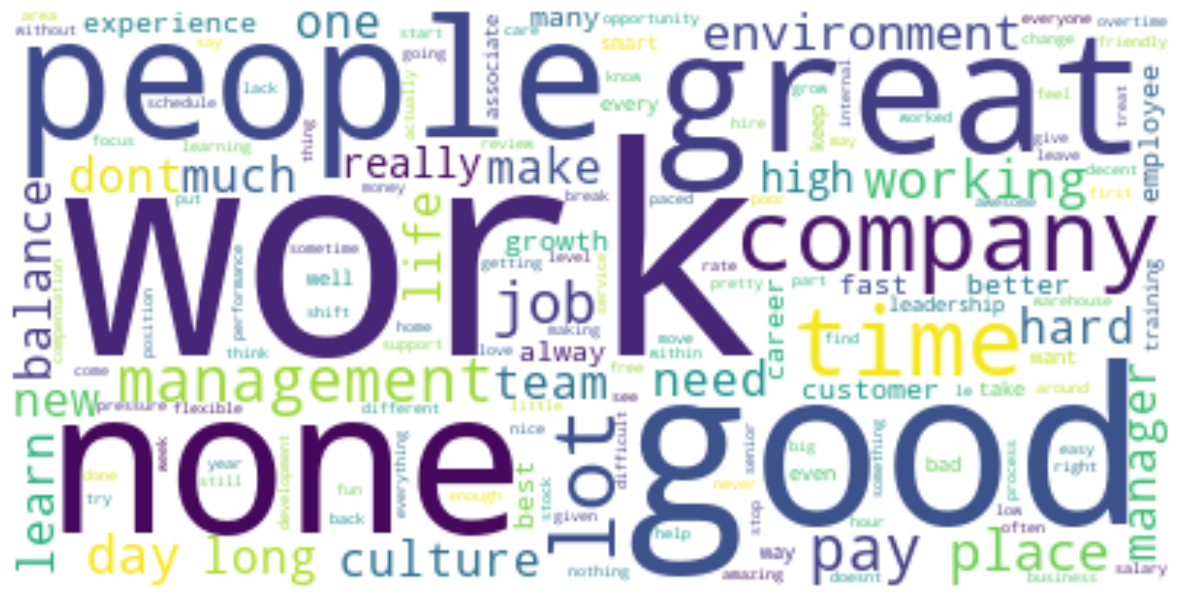

In [25]:
plot_wordcloud(processed_data)

#freq_words=doc_term_matrix(processed_data)
#freq_words.head()

Refer the above workaround.  - Working alright in Colab Pro.

### Sentiment Analysis on the processed data using Polarity

In [26]:
def check_sentiments(feedback_data):
    pol = lambda x: TextBlob(x).sentiment.polarity
    feedback_data['polarity'] = feedback_data['text'].apply(pol) #adding a column polarity with values
    
    #adding another column 'Sentiment' which represents the tweet being positive or negative
    feedback_data['Sentiment'] = np.where(feedback_data['polarity']>=0, 'Positive', 'Negative')     
    
    #adding another column 'Sentiment2' which represents the tweet being positive, negative and neutral
    feedback_data['Sentiment2'] = np.where(feedback_data.polarity< 0, 'Negative', np.where(feedback_data.polarity> 0,'Positive', 'Neutral'))
    
    #feedback_data['chk_positive'] = np.where(feedback_data['Sentiment'] == 'Positive', 1, 0)
    
    #feedback_data['chk_sentiment'] = np.where(feedback_data['polarity']> 0, 1, 0)
    
    return feedback_data;

In [27]:
final_data = check_sentiments(processed_data)

Polarity ranges from -1 to 1 (1 is more positive, 0 is neutral, -1 is more negative)

In [28]:
final_data.tail()

,text,polarity,Sentiment,Sentiment2
34244,super,0.333333,Positive,Positive
34245,work hard fun starken manager die,0.004167,Positive,Positive
34246,top man gerate boxen musical,0.250000,Positive,Positive
34247,bon mal travail tra car par sen lira,0.000000,Positive,Neutral
34248,ich mir sie mir ich mir da gut clan best ready...,0.450000,Positive,Positive


In [29]:
final_data.Sentiment.value_counts()

Positive    23418
Negative     3012
Name: Sentiment, dtype: int64

In [30]:
final_data.Sentiment2.value_counts()

Positive    22623
Negative     3012
Neutral       795
Name: Sentiment2, dtype: int64

In [31]:
polarity_count = final_data['Sentiment2'].value_counts()
polarity_count

Positive    22623
Negative     3012
Neutral       795
Name: Sentiment2, dtype: int64

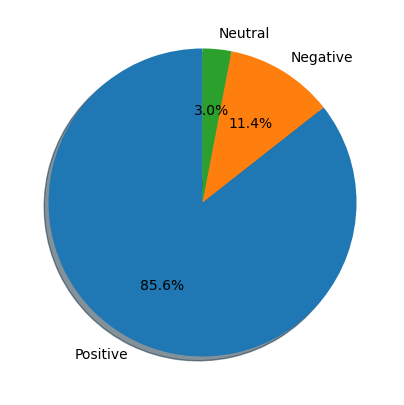

In [32]:
labels = ['Positive','Negative','Neutral']
fig = plt.figure(figsize =(5, 5))
plt.pie(polarity_count, labels = labels,autopct='%1.1f%%',
        shadow=True, startangle=90)
 
# show plot
plt.show()

### Rule Based Sentiment Analysis - using Vader Sentiment (Lexicon Based)
#### VADER = Valence Aware Dictionary and Sentiment Reasoner

In [33]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# function to calculate vader sentiment
def vadersentimentanalysis(tweet):
    vs = analyzer.polarity_scores(tweet)
    return vs['compound']
    

    # function to analyse
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound <= -0.5 :
        return 'Negative'
    else:
        return 'Neutral'

final_data['Vader_Sentiment'] = final_data['text'].apply(vadersentimentanalysis)
final_data['Vader_Analysis'] = final_data['Vader_Sentiment'].apply(vader_analysis)
final_data.head()

,text,polarity,Sentiment,Sentiment2,Vader_Sentiment,Vader_Analysis
7819,amazing place work month seen none horror publ...,0.204960,Positive,Positive,0.9953,Positive
7820,development engineering manager work hard fun ...,-0.031944,Negative,Negative,0.2023,Neutral
7821,get put really smart people lot opportunity gr...,0.289951,Positive,Positive,0.9682,Positive
7822,exciting work abusive culture jeff steam brill...,0.088571,Positive,Positive,0.8315,Positive
7823,amazing people horrible lot cool lot boring st...,0.038214,Positive,Positive,0.9768,Positive


In [34]:
vader_counts = final_data['Vader_Analysis'].value_counts()
vader_counts

Positive    18840
Neutral      6303
Negative     1287
Name: Vader_Analysis, dtype: int64

In [35]:
final_data.tail(20)

,text,polarity,Sentiment,Sentiment2,Vader_Sentiment,Vader_Analysis
34229,marketing digital vie pro vie sur none,0.000000,Positive,Neutral,0.0000,Neutral
34230,job war den wird ist none,0.000000,Positive,Neutral,-0.5994,Negative
34231,gesten fast none,0.200000,Positive,Positive,0.0000,Neutral
34232,super vie super belle tra beau tra pour rent p...,0.375000,Positive,Positive,0.9260,Positive
34233,top man man die man job ist da die,0.500000,Positive,Positive,-0.7906,Negative
34234,gut geld ich far geld none,0.100000,Positive,Positive,0.0000,Neutral
34235,ich man da man none,0.000000,Positive,Neutral,0.0000,Neutral
34236,volition pour none,0.000000,Positive,Neutral,0.0000,Neutral
34237,groot management het erg leuk fun tie erg met,0.300000,Positive,Positive,0.5106,Positive
34238,entente travail domicile plus non tra pour tou...,0.000000,Positive,Neutral,-0.2500,Neutral


In [36]:
review_data.columns

Index(['Employee Code', 'company', 'location', 'dates', 'job-title', 'summary',
       'pros', 'cons', 'advice-to-mgmt', 'overall-ratings',
       'work-balance-stars', 'culture-values-stars',
       'carrer-opportunities-stars', 'comp-benefit-stars',
       'senior-mangemnet-stars', 'link'],
      dtype='object')

##### Feedback Analysis

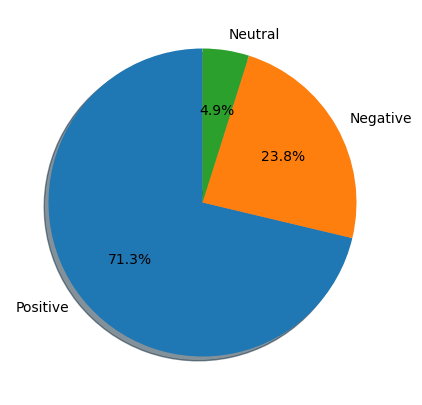

In [37]:
labels = ['Positive','Negative','Neutral']
fig = plt.figure(figsize =(5, 5))
plt.pie(vader_counts, labels = labels,autopct='%1.1f%%',
        shadow=True, startangle=90)
 
# show plot
plt.show()

In [38]:
def update_sentiments_va(feedback_data):
    
    #adding another column 'Sentiment' which represents the tweet being positive or negative
    #feedback_data['Sentiment'] = np.where(feedback_data['Vader_Sentiment']>=0, 'Positive', 'Negative')     
    
    #adding another column 'Sentiment2' which represents the tweet being positive, negative and neutral
    #feedback_data['Sentiment2'] = np.where(feedback_data.polarity< 0, 'Negative', np.where(feedback_data.polarity> 0,'Positive', 'Neutral'))
    
    feedback_data['chk_positive'] = np.where(feedback_data['Vader_Analysis'] == 'Positive', 1, 0)
    
    feedback_data['chk_sentiment'] = np.where(feedback_data['Vader_Sentiment']>0, 1, 0)
    
    return feedback_data;

In [39]:
final_data_va = update_sentiments_va(processed_data)

In [40]:
final_data_va.tail(20)

,text,polarity,Sentiment,Sentiment2,Vader_Sentiment,Vader_Analysis,chk_positive,chk_sentiment
34229,marketing digital vie pro vie sur none,0.000000,Positive,Neutral,0.0000,Neutral,0,0
34230,job war den wird ist none,0.000000,Positive,Neutral,-0.5994,Negative,0,0
34231,gesten fast none,0.200000,Positive,Positive,0.0000,Neutral,0,0
34232,super vie super belle tra beau tra pour rent p...,0.375000,Positive,Positive,0.9260,Positive,1,1
34233,top man man die man job ist da die,0.500000,Positive,Positive,-0.7906,Negative,0,0
34234,gut geld ich far geld none,0.100000,Positive,Positive,0.0000,Neutral,0,0
34235,ich man da man none,0.000000,Positive,Neutral,0.0000,Neutral,0,0
34236,volition pour none,0.000000,Positive,Neutral,0.0000,Neutral,0,0
34237,groot management het erg leuk fun tie erg met,0.300000,Positive,Positive,0.5106,Positive,1,1
34238,entente travail domicile plus non tra pour tou...,0.000000,Positive,Neutral,-0.2500,Neutral,0,0


In [41]:
output_data = final_data_va.copy()
output_data.head()

,text,polarity,Sentiment,Sentiment2,Vader_Sentiment,Vader_Analysis,chk_positive,chk_sentiment
7819,amazing place work month seen none horror publ...,0.204960,Positive,Positive,0.9953,Positive,1,1
7820,development engineering manager work hard fun ...,-0.031944,Negative,Negative,0.2023,Neutral,0,1
7821,get put really smart people lot opportunity gr...,0.289951,Positive,Positive,0.9682,Positive,1,1
7822,exciting work abusive culture jeff steam brill...,0.088571,Positive,Positive,0.8315,Positive,1,1
7823,amazing people horrible lot cool lot boring st...,0.038214,Positive,Positive,0.9768,Positive,1,1


##### Adding Employee Code and Company columns in the output_data dataframe.

In [42]:
output_data['Employee_Code'] = review_data['Employee Code']
output_data['Company'] = review_data['company']

In [43]:
output_data.columns

Index(['text', 'polarity', 'Sentiment', 'Sentiment2', 'Vader_Sentiment',
       'Vader_Analysis', 'chk_positive', 'chk_sentiment', 'Employee_Code',
       'Company'],
      dtype='object')

##### Rearranging columns

In [44]:
cols = ['Employee_Code', 'Company', 'text', 'polarity', 'Sentiment', 'Sentiment2', 'Vader_Sentiment',
       'Vader_Analysis', 'chk_positive', 'chk_sentiment']

In [45]:
output_data = output_data[cols]

In [46]:
output_data.head()

,Employee_Code,Company,text,polarity,Sentiment,Sentiment2,Vader_Sentiment,Vader_Analysis,chk_positive,chk_sentiment
7819,7820,amazon,amazing place work month seen none horror publ...,0.204960,Positive,Positive,0.9953,Positive,1,1
7820,7821,amazon,development engineering manager work hard fun ...,-0.031944,Negative,Negative,0.2023,Neutral,0,1
7821,7822,amazon,get put really smart people lot opportunity gr...,0.289951,Positive,Positive,0.9682,Positive,1,1
7822,7823,amazon,exciting work abusive culture jeff steam brill...,0.088571,Positive,Positive,0.8315,Positive,1,1
7823,7824,amazon,amazing people horrible lot cool lot boring st...,0.038214,Positive,Positive,0.9768,Positive,1,1


##### Exporting output data to local file location

In [47]:
output_data.to_csv(r'C:\Users\M0780773\OneDrive - Saint-Gobain\Desktop\Projects\Sentiment Analysis\final_output_amazon.csv')

#### Rule Based Sentiment Analysis (Method III) - using SentiWordNet (**** Not using it)

nltk.download('sentiwordnet')
from nltk.corpus import sentiwordnet as swn

def sentiwordnetanalysis(pos_data):
    sentiment = 0
    tokens_count = 0
    for word, pos in pos_data:
        if not pos:
            continue
            lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        if not lemma:
            continue
            synsets = wordnet.synsets(lemma, pos=pos)
        if not synsets:
            continue
            # Take the first sense, the most common
            synset = synsets[0]
            swn_synset = swn.senti_synset(synset.name())
            sentiment += swn_synset.pos_score() - swn_synset.neg_score()
            tokens_count += 1
            # print(swn_synset.pos_score(),swn_synset.neg_score(),swn_synset.obj_score())
        if not tokens_count:
            return 0
        if sentiment>0:
            return "Positive"
        if sentiment==0:
            return "Neutral"
        else:
            return "Negative"


final_data['SWN analysis'] = processed_data['POS tagged'].apply(sentiwordnetanalysis)
final_data.head()

##### For checking the accuracy of the model

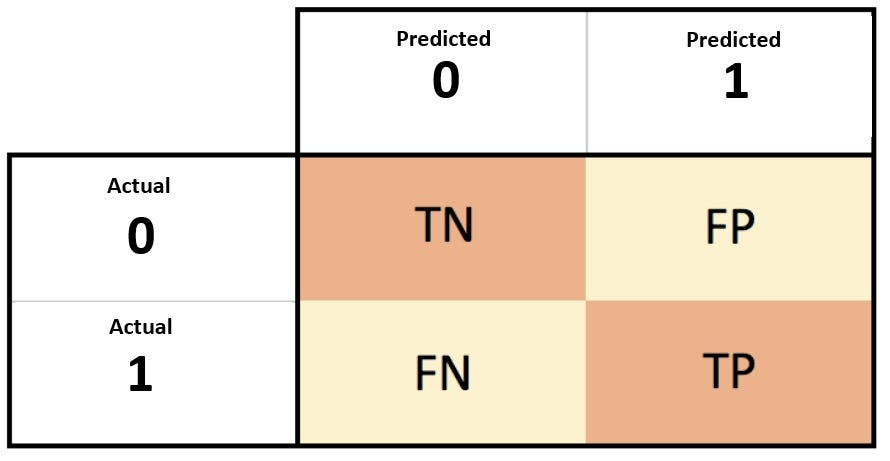

In [48]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(final_data_va['chk_positive'], final_data_va['chk_sentiment']))

[[ 3686  3904]
 [    0 18840]]


In [49]:
from sklearn.metrics import classification_report

print(classification_report(final_data_va['chk_positive'], final_data_va['chk_sentiment']))

              precision    recall  f1-score   support

           0       1.00      0.49      0.65      7590
           1       0.83      1.00      0.91     18840

    accuracy                           0.85     26430
   macro avg       0.91      0.74      0.78     26430
weighted avg       0.88      0.85      0.83     26430



* Precision = TP / (TP + FP) 
* Recall = TP / (TP + FN)
* F1 = 2 * ((Precision * Recall)/(Precision + Recall))
* Accuracy = (TP + TN) / (TP + FP + TN + FN)
* Specificity = TN / (TN + FP)

In [51]:
TP = 18840  ### Out of the actual positive, how many are correctly predicted to be positive?
FP = 3904   ### Out of the actual negatives, how many are incorrectly predicted to be positive?
FN = 0      ### Out of the actual positives, how many are incorrectly predicted to be negative? 
TN = 3686  ### Out of the actual negatives, how many are correctly predicted to be negative?

In [52]:
Precision = TP / (TP + FP)
print("Precision: ", Precision)

Precision:  0.8283503341540626


Out of all the positive predictions we made, how many were true?
        
       When the sentiment analyzer predicts the sentiment as positive, it is correct around 87.6% of the time.

In [53]:
Recall = TP / (TP + FN)
print("Recall: ", Recall)

Recall:  1.0


Out of all the data points that should be predicted as true, how many did we correctly predict as true?

        Out of the actual positive values, 100% are correctly predicted (to be positive).

In [54]:
F1 = 2 * ((Precision * Recall)/(Precision + Recall))
print("F1: ", F1)

F1:  0.9061177375913813


 measure of a model’s accuracy on a dataset - 
 
         how many times a model made a correct prediction across the entire dataset - 93.4%

In [55]:
Specificity = TN / (TN + FP)
print("Specificity: ", Specificity)

Specificity:  0.48563899868247695


        Out of all the actual negative values, 45% are correctly predicted to be negative/ negative sentiments.

In [56]:
Accuracy = (TP + TN) / (TP + FP + TN + FN)
print("Accuracy: ", Accuracy)

Accuracy:  0.8522890654559213


Out of all the predictions we made, how many were true?

#### Outcome: Rule-based sentiment analysis model is 89%.